In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

sns.set_palette("colorblind")
colorblind = sns.color_palette("colorblind")
deep = sns.color_palette("deep")

import matplotlib.font_manager as fm

# Add Avenir to the font list - try both common Avenir font names
plt.rcParams["font.family"] = ["Avenir", "Avenir Next"]     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white"


In [19]:
%matplotlib inline

In [20]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")

In [21]:
markers = [
    'o',        # circle
    r'$\clubsuit$',  # club symbol
    r'$\heartsuit$', # heart symbol
    r'$\star$',     # star
    r'$\oplus$',    # circled plus
    r'$\otimes$',   # circled times
    r'$\diamondsuit$', # diamond symbol
    r'$\circledcirc$', # double circle
    r'$\triangle$',    # triangle
    r'$\square$',      # square
    r'$\infty$',       # infinity symbol
    r'$\spadesuit$',    # spade symbol
    r'$\times$',       # times symbol
]
qwen_marker = markers[0]
llama_marker = markers[3]
qwen_color = "#ae8ff2"
llama_color = "#8fbff2"
llama_darker_color = "#5a88c2"

In [22]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")
df_qwen_all = df_qwen[df_qwen["condition"] == "all_strategies"].sort_values("step")
df_llama_all = df_llama[df_llama["condition"] == "all_strategies"].sort_values("step")
df_llama_backtracking_ver = df_llama[df_llama["condition"] == "backtracking_verfication"].sort_values("step")
df_llama_backtracking_subgoal = df_llama[df_llama["condition"] == "backtracking_subgoal"].sort_values("step")
df_llama_backtracking_backward = df_llama[df_llama["condition"] == "backtracking_backward"].sort_values("step")
df_llama_backtracking = df_llama[df_llama["condition"] == "only_backtracking"].sort_values("step")
df_qwen_backtracking = df_qwen[df_qwen["condition"] == "only_backtracking"].sort_values("step")
df_qwen_backtracking_ver = df_qwen[df_qwen["condition"] == "backtracking_verfication"].sort_values("step")
df_qwen_backtracking_subgoal = df_qwen[df_qwen["condition"] == "backtracking_subgoal"].sort_values("step")
df_qwen_backtracking_backward = df_qwen[df_qwen["condition"] == "backtracking_backward"].sort_values("step")
df_qwen_empty_cot = df_qwen[df_qwen["condition"] == "empty_cot"].sort_values("step")
df_qwen_dots = df_qwen[df_qwen["condition"] == "dots"].sort_values("step")
df_llama_incorrect_cot = df_llama[df_llama["condition"] == "no_positive_all_strategies"].sort_values("step")
df_llama_owmqa = df_llama[df_llama["condition"] == "owmathqa2_ppo"].sort_values("step")
df_llama_owmqa_none = df_llama[df_llama["condition"] == "owmathqa_none_ppo1"].sort_values("step")

In [23]:
len(df_qwen_base)

25

# Inherent abilities in the Base models

In [6]:
df_llama3b_base = df_llama[df_llama['condition'] == 'base_ppo']
df_llama70b_base = df_llama[df_llama['condition'] == 'base_70b']

df_llama3b_base = df_llama3b_base[df_llama3b_base['step'] == 0]
df_qwen_base = df_qwen_base[df_qwen_base['step'] == 0]

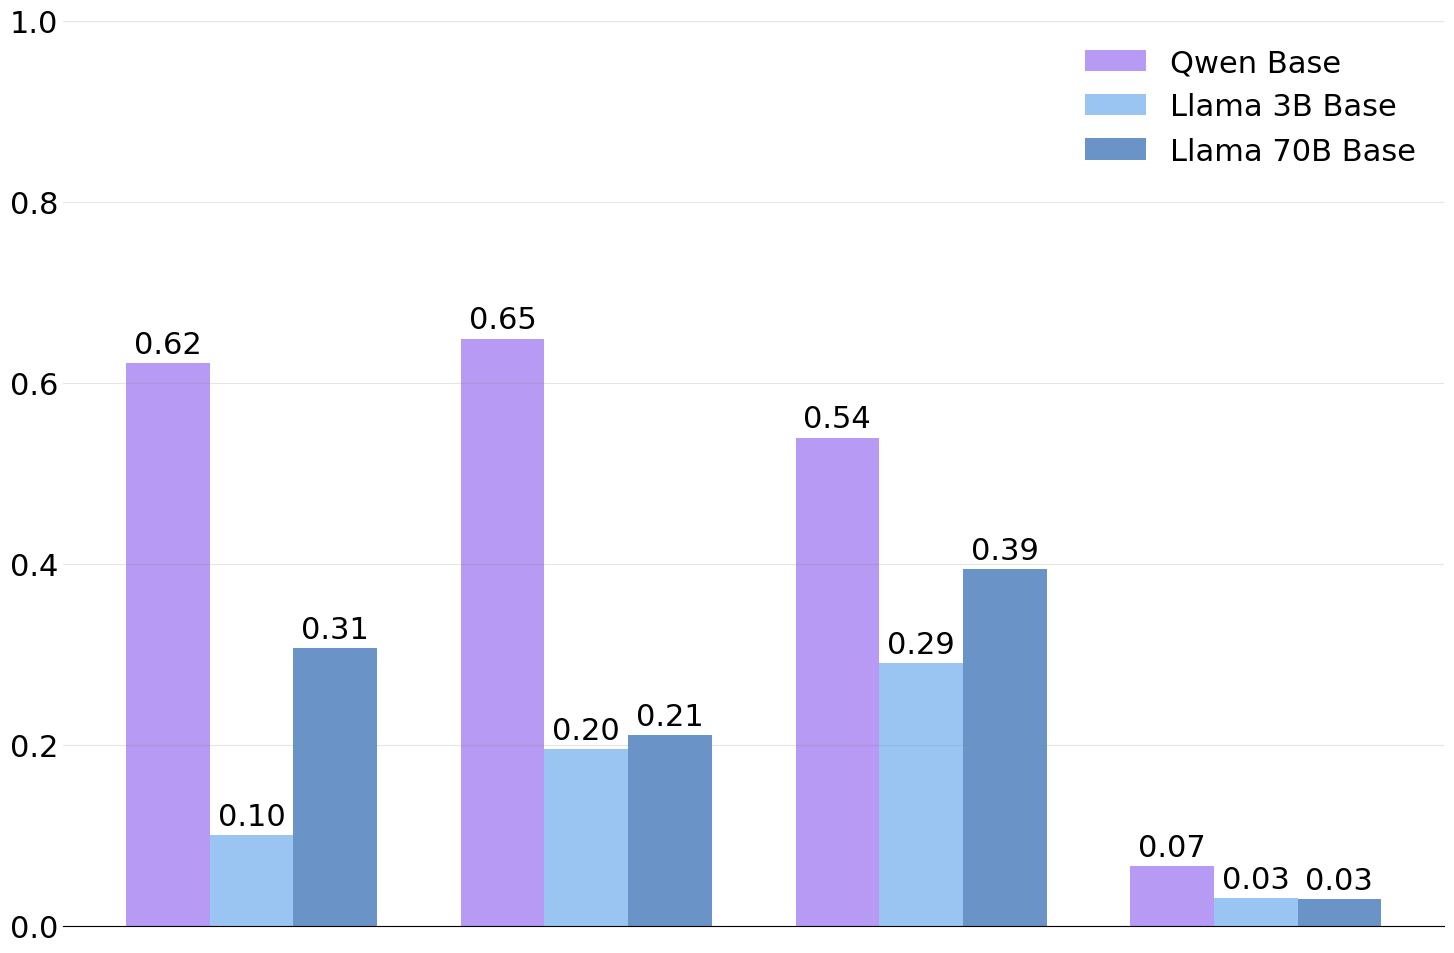

In [7]:
import matplotlib.patches as mpatches

metrics = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']

qwen = [df_qwen_base[metric].max() for metric in metrics]
llama3b = [df_llama3b_base[metric].max() for metric in metrics]
llama70b = [df_llama70b_base[metric].max() for metric in metrics]

x = np.arange(len(metrics))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 10))

# Define colors for each metric from the predefined "colorblind" list

# Qwen Base bars: white fill with colored edges and hatch pattern 'o'
rects1 = ax.bar(x - width, qwen, width, label='Qwen Base', alpha=0.9, facecolor=qwen_color)

# LLaMA 3B Base bars: white fill with colored edges and hatch pattern 'x'
rects2 = ax.bar(x, llama3b, width, label='Llama 3B Base', alpha=0.9, facecolor=llama_color)

rects3 = ax.bar(x + width, llama70b, width, label='Llama 70B Base', alpha=0.9, facecolor=llama_darker_color)

# Customize plot
ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.tick_params(axis='y', which='both', length=0)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Add legend
plt.legend(['Qwen Base', 'Llama 3B Base', 'Llama 70B Base'], loc='best', frameon=False)

plt.tight_layout()
# save
plt.savefig('init_base_behavior_comparison.png', dpi=300, bbox_inches='tight')


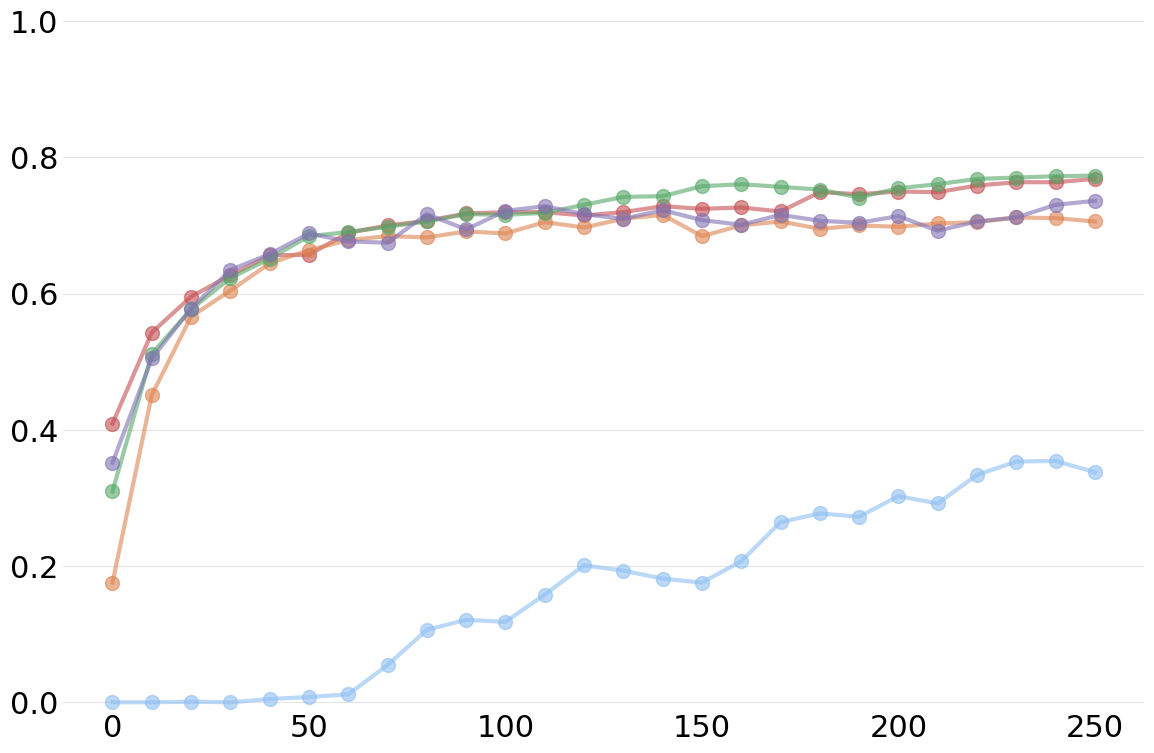

In [8]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["accuracy"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["accuracy"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["accuracy"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["accuracy"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["accuracy"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_accuracy_llama.png", dpi=300)
plt.show()

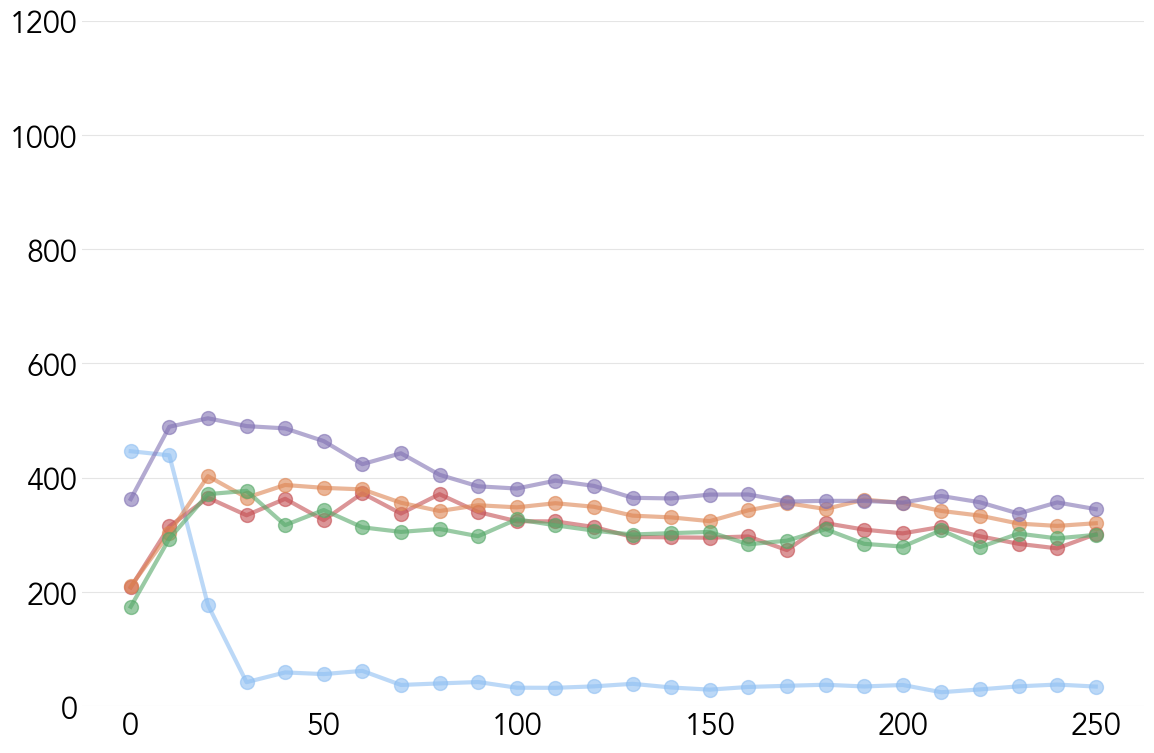

In [24]:
# plot accuracy for qwen and llama
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1200)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["response_length"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["response_length"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["response_length"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["response_length"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["response_length"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["response_length"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_response_length_llama.png", dpi=300)
plt.show()

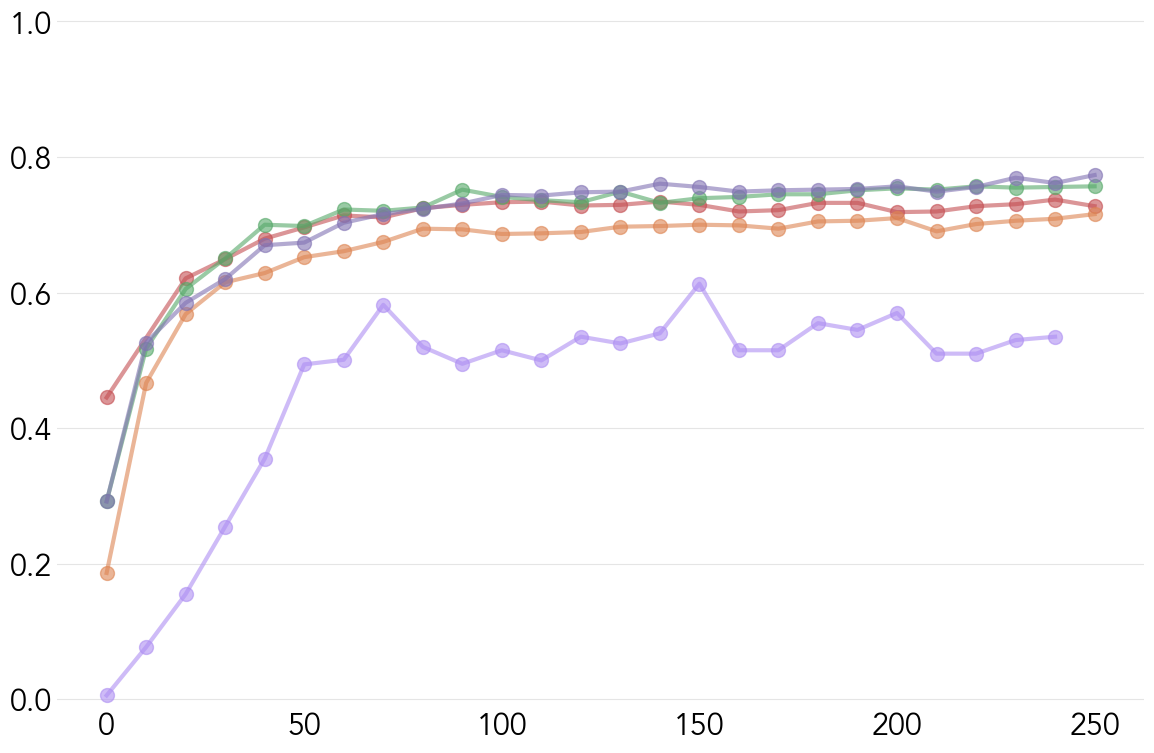

In [28]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_ver["step"], df_qwen_backtracking_ver["accuracy"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking["step"], df_qwen_backtracking["accuracy"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_subgoal["step"], df_qwen_backtracking_subgoal["accuracy"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_backward["step"], df_qwen_backtracking_backward["accuracy"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_qwen_all["step"], df_qwen_all["accuracy"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)


plt.tight_layout()
# save the plot
plt.savefig("priming_rl_accuracy_qwen.png", dpi=300)
plt.show()

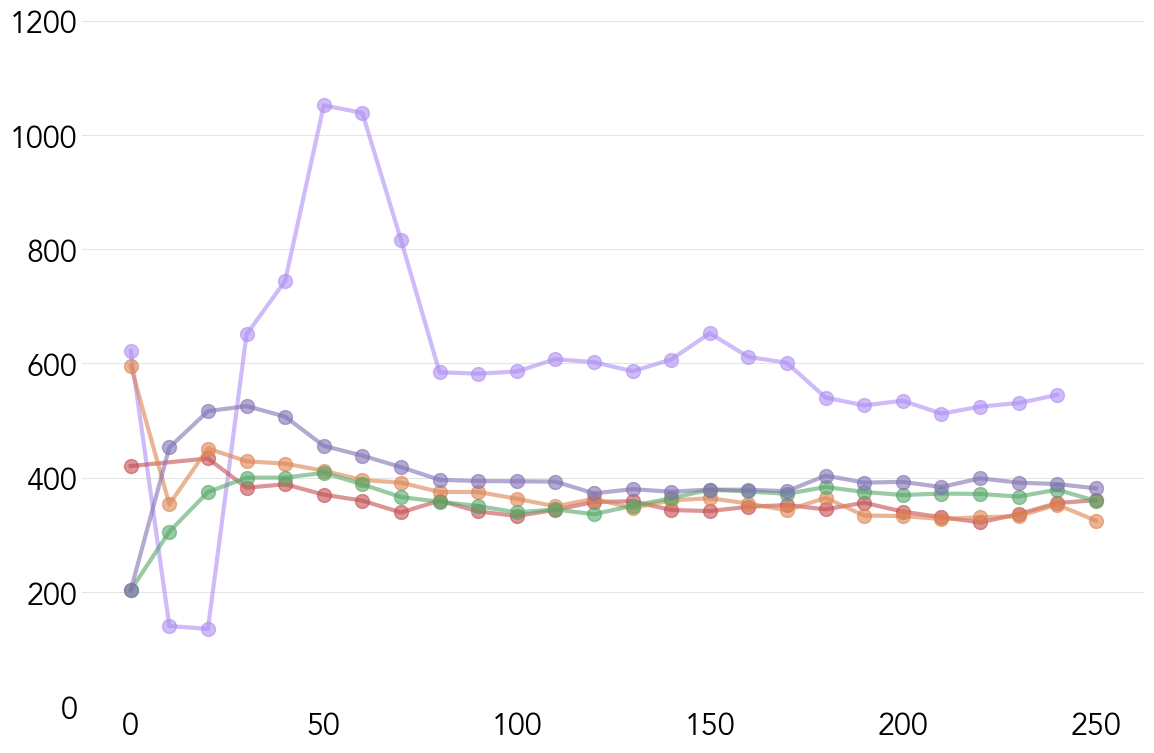

In [29]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1200)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["response_length"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_ver["step"], df_qwen_backtracking_ver["response_length"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking["step"], df_qwen_backtracking["response_length"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_subgoal["step"], df_qwen_backtracking_subgoal["response_length"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_qwen_backtracking_backward["step"], df_qwen_backtracking_backward["response_length"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_qwen_all["step"], df_qwen_all["response_length"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_response_length_qwen.png", dpi=300)
plt.show()

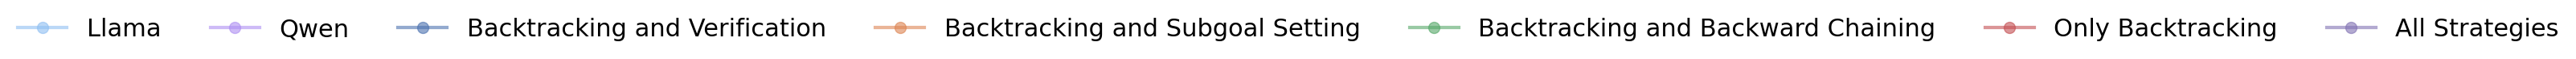

In [12]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(35, 1))  # Adjusted size for horizontal stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_base': 'Llama',
    'qwen_base': 'Qwen',
    'backtracking_verfication': 'Backtracking and Verification',
    'backtracking_subgoal': 'Backtracking and Subgoal Setting',
    'backtracking_backward': 'Backtracking and Backward Chaining',
    'backtracking': 'Only Backtracking',
    'all_strategies': 'All Strategies',
}
all_sft_color_bindings = {
    'llama_base': llama_color,
    'qwen_base': qwen_color,
    'backtracking_verfication': deep[0],
    'backtracking_subgoal': deep[1],
    'backtracking_backward': deep[2],
    'backtracking': deep[3],
    'all_strategies': deep[4],
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[condition],
                      marker=qwen_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[condition], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=7,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.savefig("legend_cold_start_all.png", dpi=300)
plt.show()

# Empty CoTs

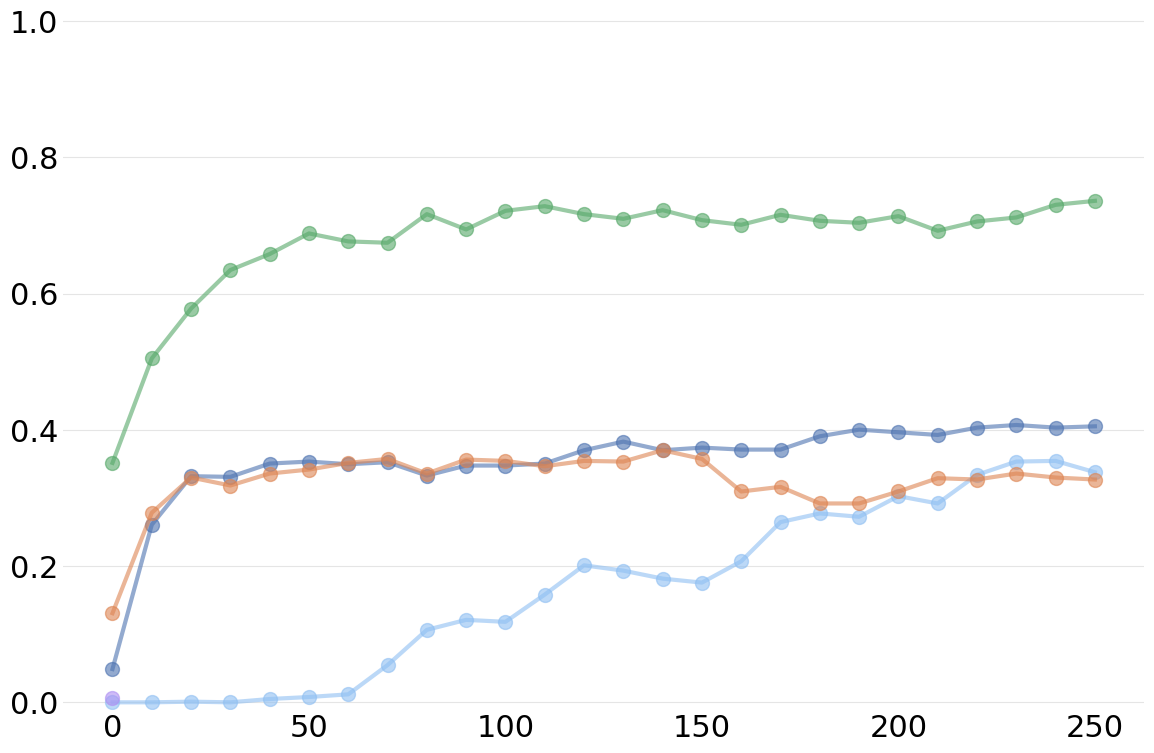

In [13]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["accuracy"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_qwen_empty_cot["step"], df_qwen_empty_cot["accuracy"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_dots["step"], df_qwen_dots["accuracy"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_empty_cot_accuracy.png", dpi=300)

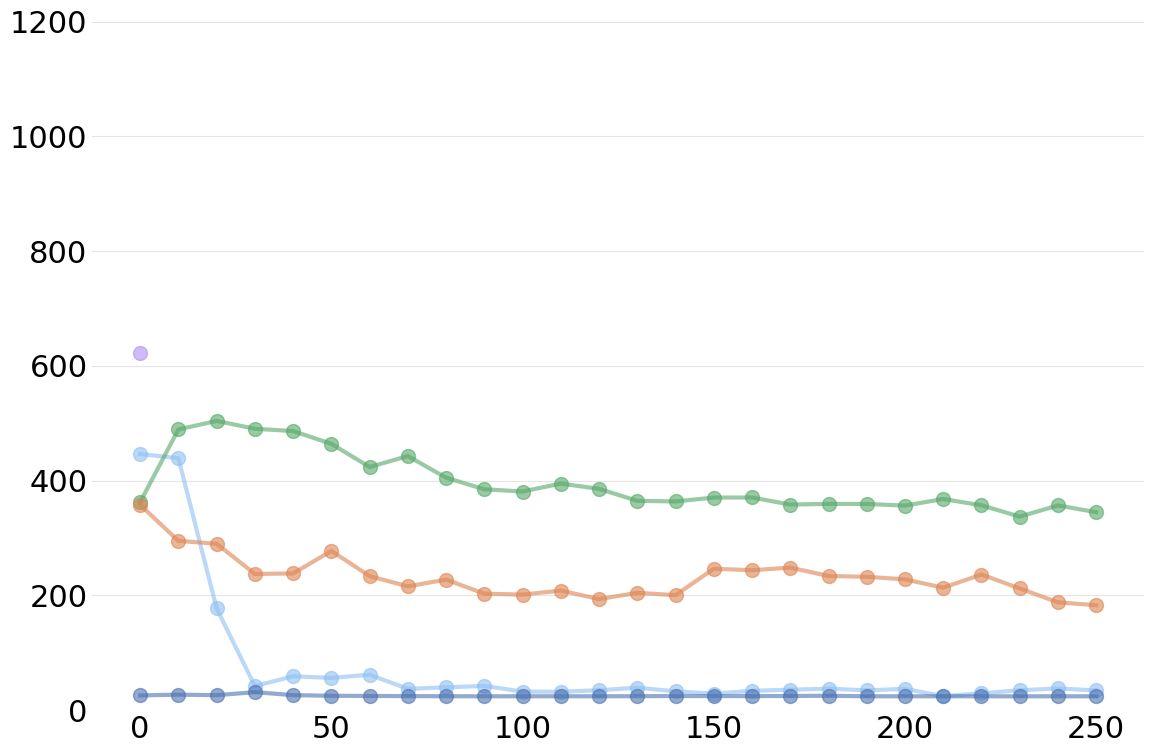

In [14]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1200)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["response_length"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["response_length"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_qwen_base["step"], df_qwen_base["response_length"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_qwen_empty_cot["step"], df_qwen_empty_cot["response_length"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_dots["step"], df_qwen_dots["response_length"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_empty_cot_response_length.png", dpi=300)
plt.show()

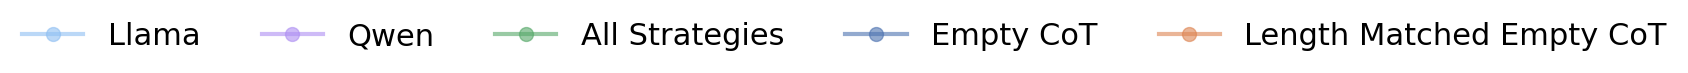

In [15]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(23, 1))  # Adjusted size for horizontal stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_base': 'Llama',
    'qwen_base': 'Qwen',
    'all_strategies': 'All Strategies',
    'empty_cot': 'Empty CoT',
    'dots': 'Length Matched Empty CoT',
}
all_sft_color_bindings = {
    'llama_base': llama_color,
    'qwen_base': qwen_color,
    'all_strategies': deep[2],
    'empty_cot': deep[0],
    'dots': deep[1],
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[condition],
                      marker=qwen_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[condition], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=7,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.savefig("legend_cold_start_empty_cot.png", dpi=300)
plt.show()

# Incorrect COTs

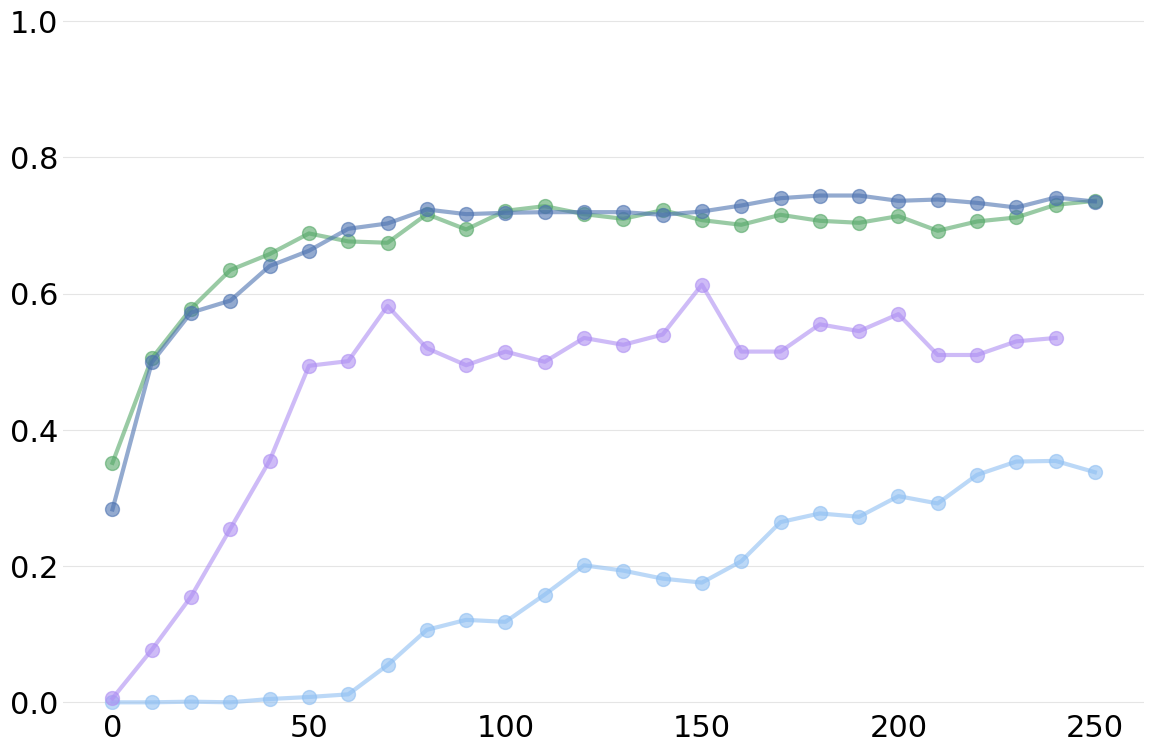

In [54]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["accuracy"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_incorrect_cot["step"], df_llama_incorrect_cot["accuracy"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_incorrect_cot_accuracy.png", dpi=300)

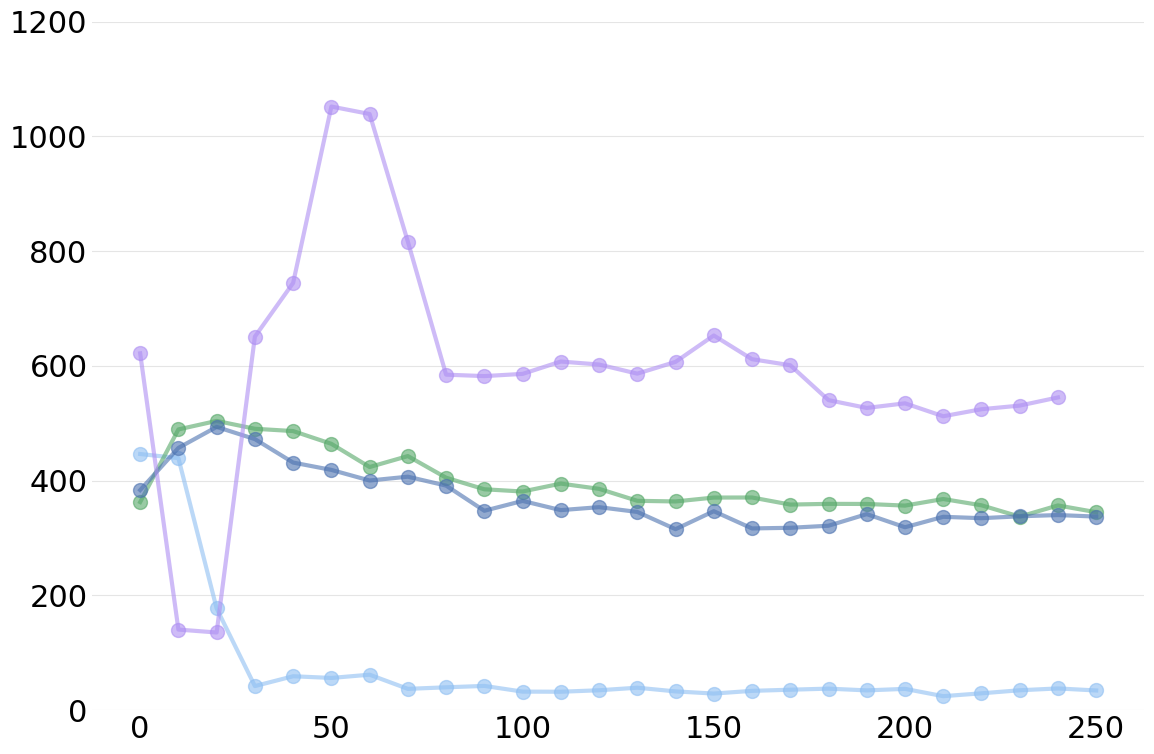

In [55]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1200)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_llama_base["step"], df_llama_base["response_length"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["response_length"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_incorrect_cot["step"], df_llama_incorrect_cot["response_length"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_qwen_base["step"], df_qwen_base["response_length"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)

# add legend
# ax.legend(["Llama", "Backtracking Verification", "Backtracking Subgoal", "Backtracking Backward", "Backtracking", "All Strategies"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("priming_incorrect_cot_response_length.png", dpi=300)

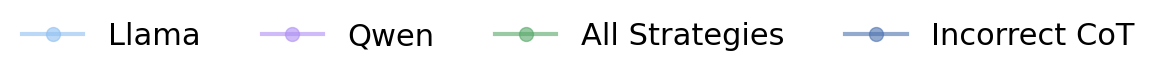

In [57]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(15, 1))  # Adjusted size for horizontal stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_base': 'Llama',
    'qwen_base': 'Qwen',
    'all_strategies': 'All Strategies',
    'incorrect_cot': 'Incorrect CoT',
}
all_sft_color_bindings = {
    'llama_base': llama_color,
    'qwen_base': qwen_color,
    'all_strategies': deep[2],
    'incorrect_cot': deep[0],
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[condition],
                      marker=qwen_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[condition], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=4,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.savefig("legend_cold_start_incorrect_cot.png", dpi=300)
plt.show()

# behaviors in priming

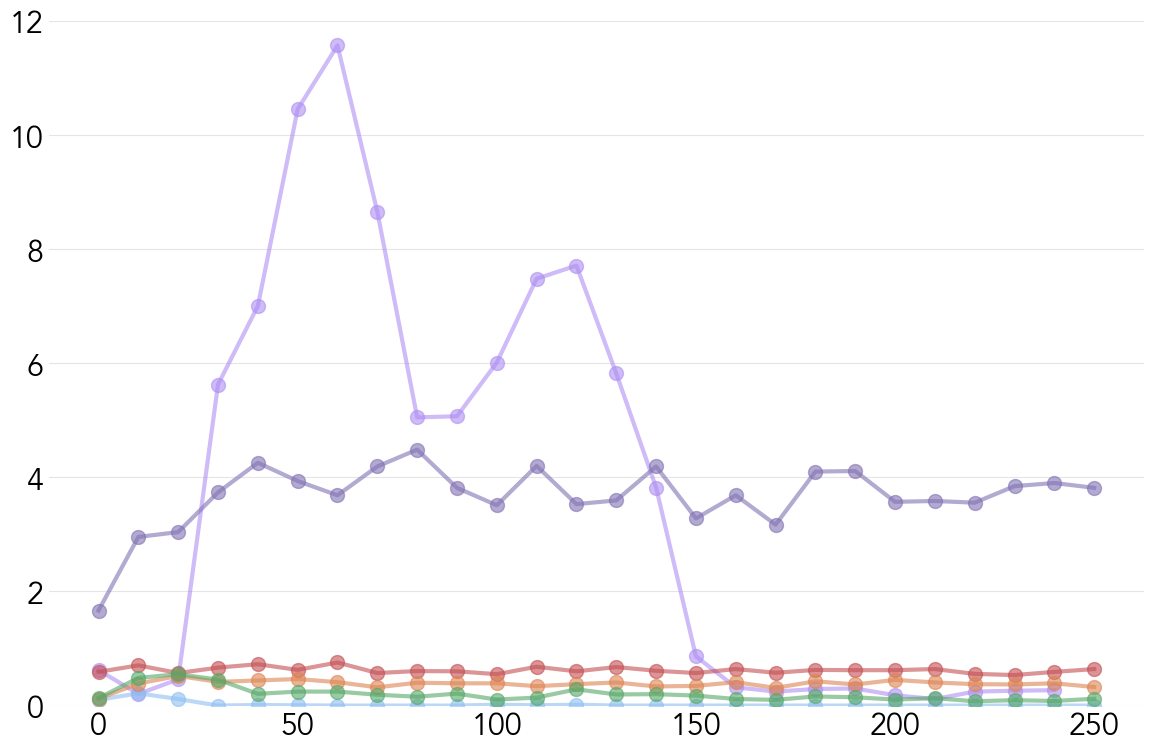

In [32]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["avg_verifications"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["avg_verifications"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["avg_verifications"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["avg_verifications"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["avg_verifications"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["avg_verifications"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["avg_verifications"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_avg_verifications.png", dpi=300)
plt.show()

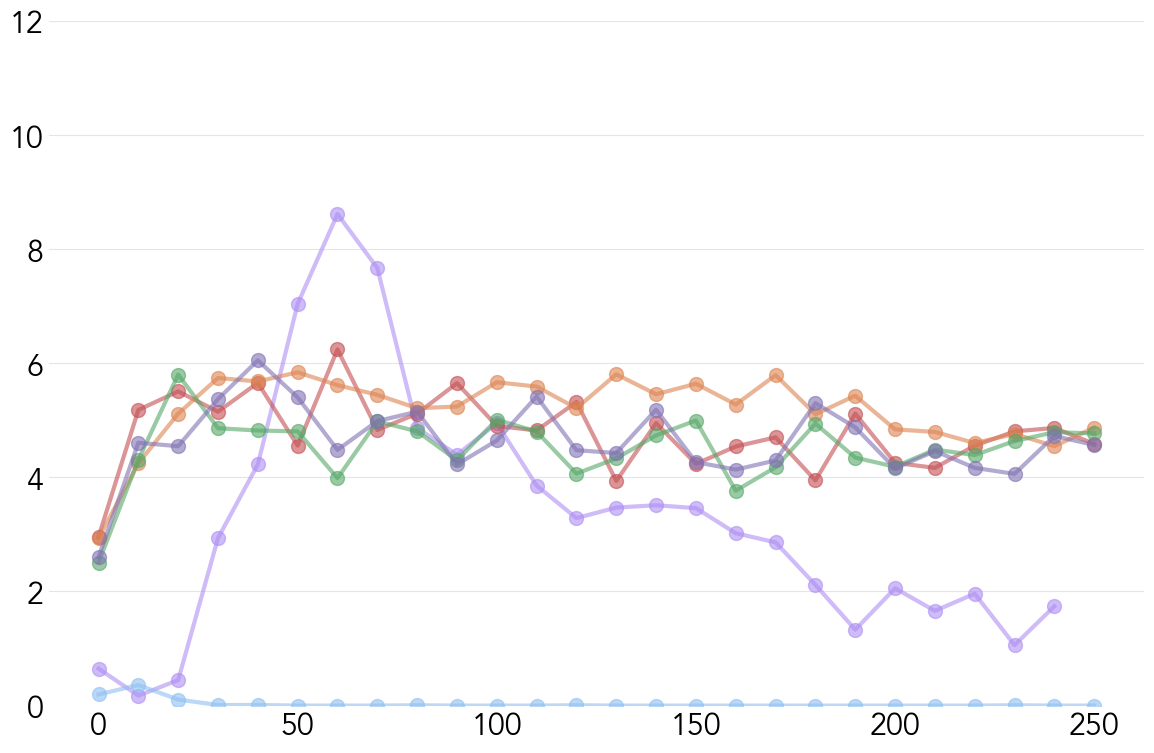

In [31]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["avg_backtracking"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["avg_backtracking"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["avg_backtracking"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["avg_backtracking"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["avg_backtracking"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["avg_backtracking"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["avg_backtracking"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_avg_backtracking.png", dpi=300)
plt.show()

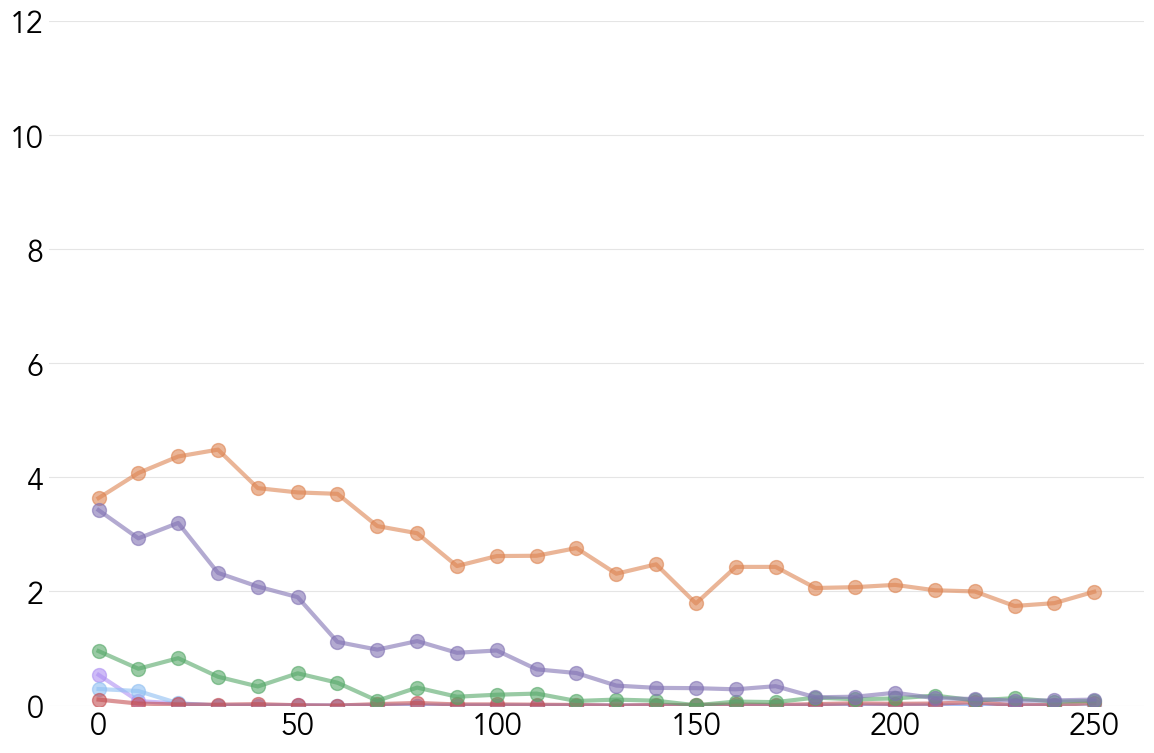

In [30]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["avg_subgoals"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["avg_subgoals"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["avg_subgoals"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["avg_subgoals"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["avg_subgoals"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["avg_subgoals"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["avg_subgoals"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_avg_subgoals.png", dpi=300)
plt.show()

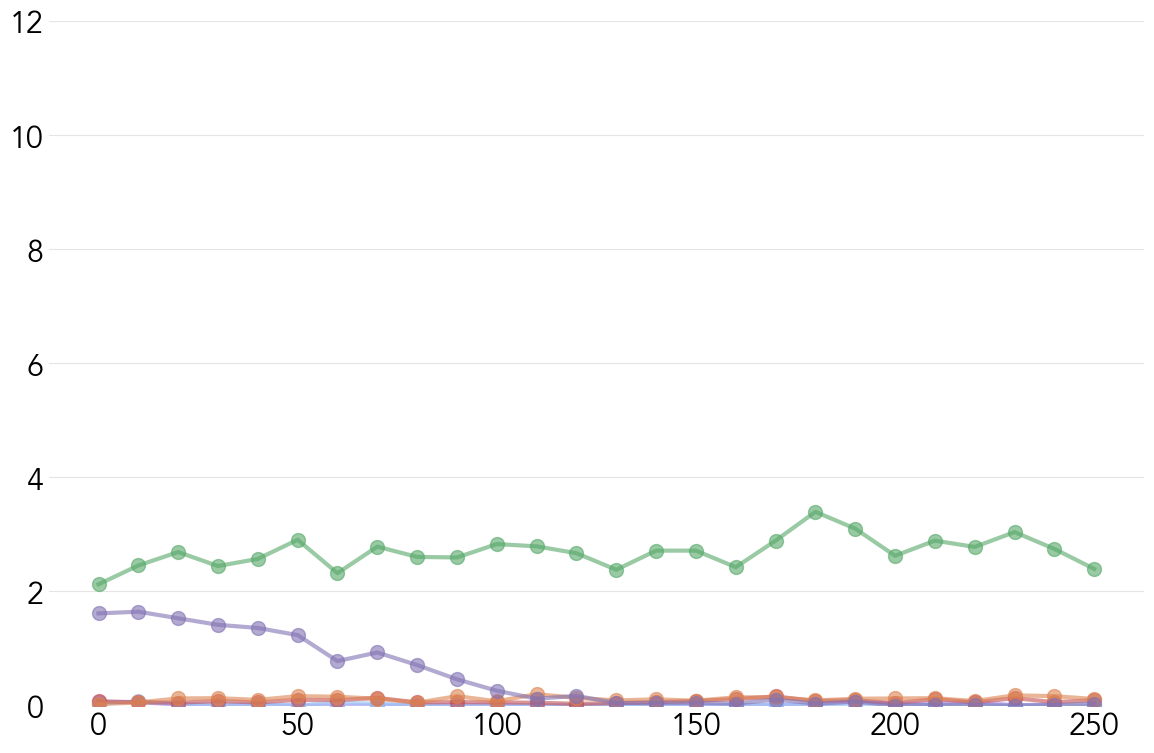

In [33]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["avg_backwards"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["avg_backwards"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_ver["step"], df_llama_backtracking_ver["avg_backwards"], marker=qwen_marker, markersize=10, color=deep[0], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking["step"], df_llama_backtracking["avg_backwards"], marker=qwen_marker, markersize=10, color=deep[3], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_subgoal["step"], df_llama_backtracking_subgoal["avg_backwards"], marker=qwen_marker, markersize=10, color=deep[1], alpha=0.6, linewidth=3)
ax.plot(df_llama_backtracking_backward["step"], df_llama_backtracking_backward["avg_backwards"], marker=qwen_marker, markersize=10, color=deep[2], alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["avg_backwards"], marker=qwen_marker, markersize=10, color=deep[4], alpha=0.6, linewidth=3)

plt.tight_layout()
# save the plot
plt.savefig("priming_rl_avg_backwards.png", dpi=300)
plt.show()